In [90]:
# install open DataSet
!pip install opendatasets

In [91]:
# Import Libary
import pandas as pd # Work to data set
import matplotlib.pyplot as plt # Data visualisation
import tensorflow as tf # Build nuralnetwork
import opendatasets as od # Using Kaggel data set dawnload

In [92]:
# Download dataset
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [93]:
# Load Data
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")

In [94]:
# Show first 5 data
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [95]:
# The 'label' column contains non-numerical (categorical) values, such as strings or class names.
# These may need to be encoded (e.g., using LabelEncoder or OneHotEncoder) before applying machine learning algorithms.
# Convert male = 1, female = 0

data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [96]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [97]:
# Define X and Y
X = data.drop('Sex', axis=1)
y = data['Sex']

In [98]:
# Normalize X values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [99]:
X.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [100]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [101]:
# Convert the encoded categorical labels to integers
# Ensure that y has been label encoded before this step
y = y.astype('int')


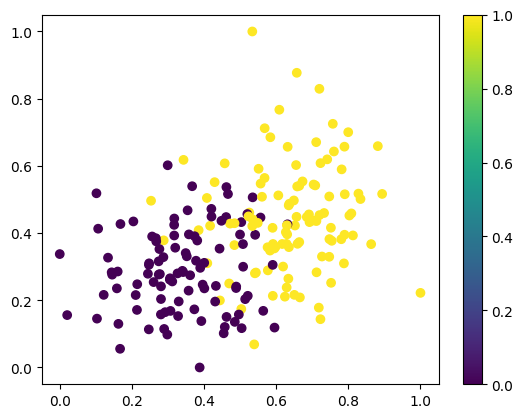

In [102]:
# Visualisacion using mathlib
plt.scatter(X['Height'], X['Weight'], c=y) #  c='b --> color is yellow
plt.colorbar()
plt.show()

In [103]:
# Tran and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# X train and test shape
X_train.shape, X_test.shape

((164, 2), (41, 2))

In [105]:
# Complete Data
data.shape

(205, 3)

# Model Building using Nural network

In [106]:
# create Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)), # Hidden layer with 4 units(Nuron), input shape of (2,)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit(Nuron)
])

# Compile the model with:
# - Binary crossentropy loss (used for binary classification problems)
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), # - Adam optimizer with a learning rate of 0.01
              metrics = ['accuracy']) # - Accuracy as the evaluation metric during training and validation

# Train model
# Train the model on the training data for 5 epochs
# 'history' stores the training metrics (e.g., loss and accuracy) for each epoch
epoch_number = 20
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5199 - loss: 0.6697
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5035 - loss: 0.6518 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5388 - loss: 0.6185 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5534 - loss: 0.6039 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7652 - loss: 0.5620 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8295 - loss: 0.5421  
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8495 - loss: 0.4916 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7799 - loss: 0.4926 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8515 - loss: 0.4237 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8621 - loss: 0.3901 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8566 - loss: 0.3603 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.3204 
Epoch 13/20


In [107]:
# Model Architector Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

## **Model Evaluate**

In [108]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9141 - loss: 0.2467 


[0.26062947511672974, 0.9024389982223511]

In [109]:
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [110]:
# Predict Value
y_pred[:5]

array([[0.11812332],
       [0.9735835 ],
       [0.99118704],
       [0.20460011],
       [0.9673862 ]], dtype=float32)

In [111]:
# Acctual Value
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


## Determind Profomance Mesure

### Using Precision Method

In [112]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

###  Using Recall Method


In [113]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

**History**

In [114]:
history.history

{'accuracy': [0.5243902206420898,
  0.5243902206420898,
  0.5304877758026123,
  0.5670731663703918,
  0.7621951103210449,
  0.8353658318519592,
  0.8048780560493469,
  0.8109756112098694,
  0.8475610017776489,
  0.8536585569381714,
  0.8658536672592163,
  0.8414633870124817,
  0.8414633870124817,
  0.8719512224197388,
  0.8414633870124817,
  0.8536585569381714,
  0.8658536672592163,
  0.8658536672592163,
  0.8536585569381714,
  0.8719512224197388],
 'loss': [0.6612570881843567,
  0.6363452672958374,
  0.6277152299880981,
  0.5955075025558472,
  0.5659286975860596,
  0.5403931140899658,
  0.5070706605911255,
  0.47230133414268494,
  0.42701423168182373,
  0.3926537334918976,
  0.3586106300354004,
  0.34345534443855286,
  0.31332096457481384,
  0.31117793917655945,
  0.3172471523284912,
  0.2888628840446472,
  0.2907041609287262,
  0.2842704653739929,
  0.2755219638347626,
  0.27762988209724426]}

Text(0.5, 0, 'epoch')

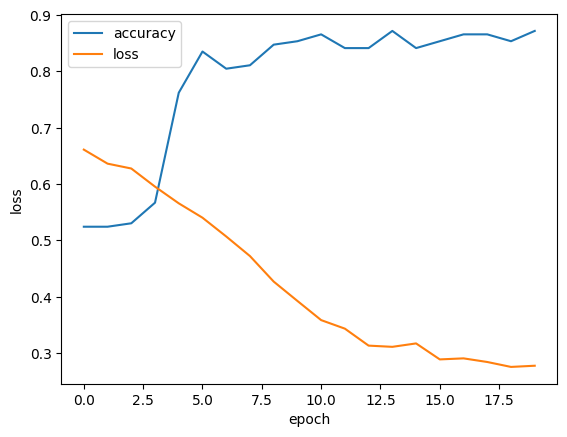

In [115]:
# History Visualization

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')